# Акции Сбербанка

Populating the interactive namespace from numpy and matplotlib


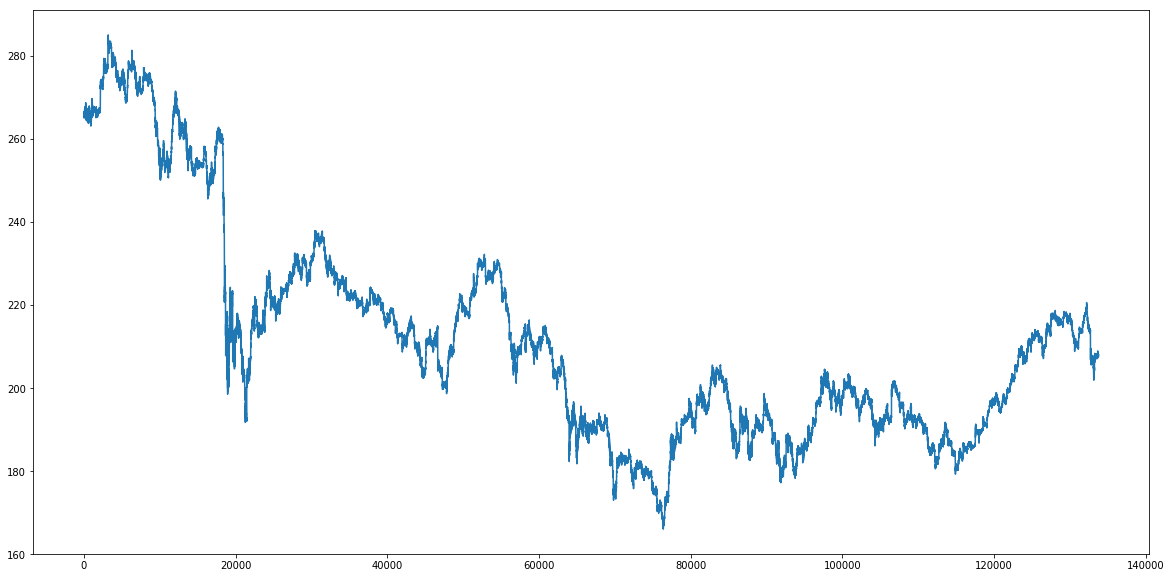

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/SBER.csv')
data['<DIFF>'] = data['<HIGH>'] - data['<LOW>']

plt.figure(figsize(20,10))
data['<CLOSE>'].plot()
plt.show()

In [2]:
data[:10]

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<DIFF>
0,15/02/18,10:01:00,267.53,267.53,265.52,266.11,865360,2.01
1,15/02/18,10:02:00,266.20,266.39,265.81,266.00,312280,0.58
2,15/02/18,10:03:00,266.00,266.18,265.80,266.10,462540,0.38
3,15/02/18,10:04:00,266.10,266.37,266.00,266.10,301960,0.37
4,15/02/18,10:05:00,266.10,266.19,265.90,265.98,223040,0.29
5,15/02/18,10:06:00,265.98,266.00,265.55,265.56,561590,0.45
6,15/02/18,10:07:00,265.57,265.71,265.31,265.40,292560,0.40
7,15/02/18,10:08:00,265.45,265.50,265.31,265.37,185780,0.19
8,15/02/18,10:09:00,265.35,265.70,265.35,265.43,258580,0.35
9,15/02/18,10:10:00,265.43,265.45,265.10,265.25,455910,0.35


In [17]:
%time
WINDOW = 60
FORECAST = 10

features = []  
labels = []

for i in range(WINDOW, len(data)-FORECAST-1):  
    features.append(data[i-WINDOW:i].values)
    labels.append(data['<CLOSE>'][i+FORECAST])

#features, labels = np.array(features), np.array(labels) 

Wall time: 0 ns


In [34]:
X, Y = features[-60*24:], labels[-60*24:]

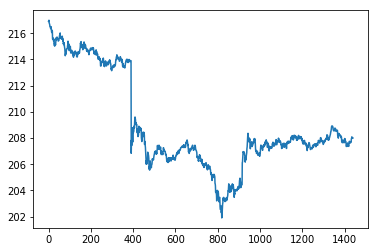

In [50]:
plt.plot(Y)
plt.show()

X, Y = np.array(X), np.array(Y)

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *

In [60]:
act_func = 'tanh'

model = Sequential()  
model.add(LSTM(units=50, activation=act_func, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))  
model.add(Dropout(0.2))  

model.add(LSTM(units=50, activation=act_func, return_sequences=True))  
model.add(Dropout(0.2))

#model.add(LSTM(units=50, return_sequences=True))  
#model.add(Dropout(0.2))

model.add(LSTM(units=50, activation=act_func))  
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
model.fit(X, Y,
              batch_size=64,
              epochs=10,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 1296 samples, validate on 144 samples
Epoch 1/10


ValueError: could not convert string to float: '13/02/19'